In [1]:
import pandas as pd


data = pd.read_csv(r'C:\5th semester\Machine Learning\Mahnoor 5th sem\WA_Fn-UseC_-HR-Employee-Attrition.csv')



print(data.head())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [2]:
print(data.isnull().sum())


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [3]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
print(data.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [5]:
data['HighPerformer'] = (data['PerformanceRating'] > 3).astype(int)

# Correct features
features = ['YearsAtCompany', 'TrainingTimesLastYear', 'PerformanceRating',
            'Department', 'JobRole', 'Education']

# Select features and target
X = data[features]
y = data['HighPerformer']

print(X.head())
print(y.head())


   YearsAtCompany  TrainingTimesLastYear  PerformanceRating  \
0               6                      0                  3   
1              10                      3                  4   
2               0                      3                  3   
3               8                      3                  3   
4               2                      3                  3   

               Department                JobRole  Education  
0                   Sales        Sales Executive          2  
1  Research & Development     Research Scientist          1  
2  Research & Development  Laboratory Technician          2  
3  Research & Development     Research Scientist          4  
4  Research & Development  Laboratory Technician          1  
0    0
1    1
2    0
3    0
4    0
Name: HighPerformer, dtype: int32


In [6]:
print(data.describe())


               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [7]:

X_encoded = pd.get_dummies(X, columns=['Department', 'JobRole', 'Education'], drop_first=True)

print(X_encoded.head())


   YearsAtCompany  TrainingTimesLastYear  PerformanceRating  \
0               6                      0                  3   
1              10                      3                  4   
2               0                      3                  3   
3               8                      3                  3   
4               2                      3                  3   

   Department_Research & Development  Department_Sales  \
0                              False              True   
1                               True             False   
2                               True             False   
3                               True             False   
4                               True             False   

   JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
0                    False                          False            False   
1                    False                          False            False   
2                    False            

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)


(1176, 17) (294, 17)


In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize SVM with linear kernel
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       251
           1       1.00      1.00      1.00        43

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294


Confusion Matrix:
 [[251   0]
 [  0  43]]


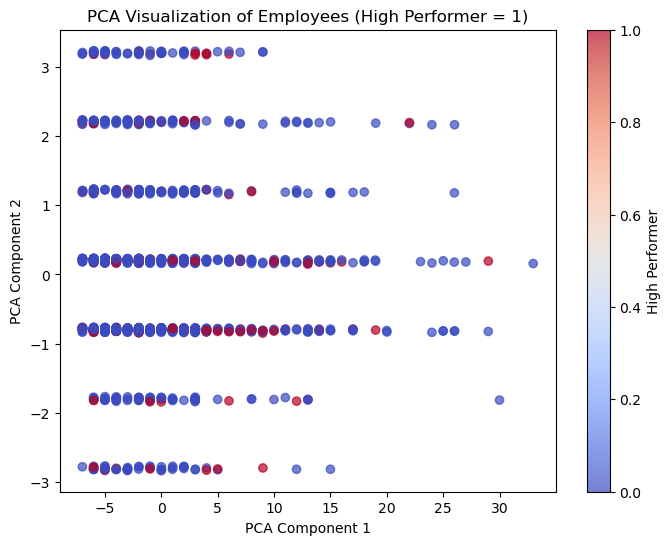

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce features to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

# Plot employees with colors based on High Performer
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Employees (High Performer = 1)')
plt.colorbar(label='High Performer')
plt.show()


c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


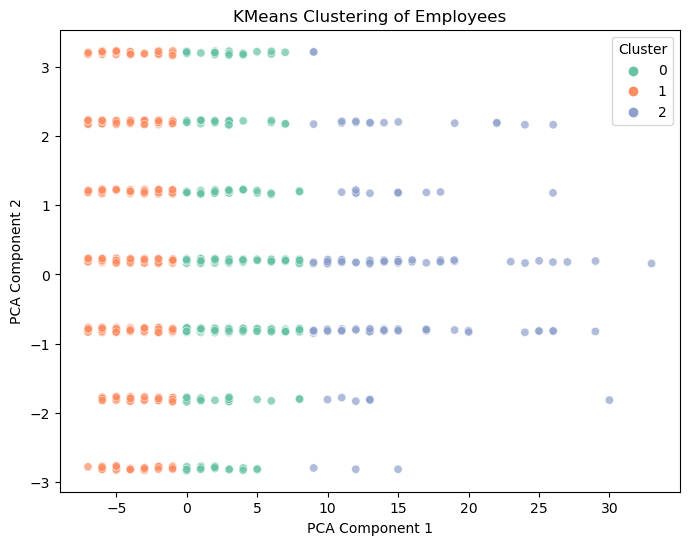

In [11]:
from sklearn.cluster import KMeans
import seaborn as sns

# Let's create 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_encoded)

# Add cluster info to dataset
data['Cluster'] = clusters

# Visualize clusters on PCA plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='Set2', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering of Employees')
plt.legend(title='Cluster')
plt.show()


In [12]:
import pickle

# Suppose your model is called svm_model
with open("svm_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)


In [13]:
import typing_extensions
print(typing_extensions.__version__)


AttributeError: module 'typing_extensions' has no attribute '__version__'

In [14]:
import gradio as gr
import pandas as pd
import pickle
import numpy as np

# Load your trained model
# model = pickle.load(open('model.pkl', 'rb'))

def predict_attrition(years_at_company, training_times_last_year, performance_rating, 
                      department, job_role, education):
    """
    Predict employee attrition based on input features
    """
    # Create a DataFrame with the input features
    input_data = pd.DataFrame({
        'YearsAtCompany': [years_at_company],
        'TrainingTimesLastYear': [training_times_last_year],
        'PerformanceRating': [performance_rating],
        'Department': [department],
        'JobRole': [job_role],
        'Education': [education]
    })
    
    # Make prediction (uncomment when model is loaded)
    # prediction = model.predict(input_data)[0]
    # probability = model.predict_proba(input_data)[0]
    
    # Placeholder for demonstration
    prediction = "No" if years_at_company > 5 else "Yes"
    
    return f"Attrition Prediction: {prediction}"

# Create Gradio interface
interface = gr.Interface(
    fn=predict_attrition,
    inputs=[
        gr.Slider(minimum=0, maximum=40, step=1, label="Years At Company"),
        gr.Slider(minimum=0, maximum=6, step=1, label="Training Times Last Year"),
        gr.Slider(minimum=1, maximum=4, step=1, label="Performance Rating"),
        gr.Dropdown(["Sales", "HR", "IT", "Research"], label="Department"),
        gr.Dropdown(["Sales Executive", "Analyst", "Manager", "Technician"], label="Job Role"),
        gr.Dropdown(["Bachelor", "Master", "PhD", "High School"], label="Education")
    ],
    outputs="text",
    title="Employee Attrition Predictor",
    description="Predict employee attrition based on company features"
)

if __name__ == "__main__":
    interface.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [9]:
!pip install gradio

^C
